In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from sklearn.cluster import KMeans


In [30]:
from src import CompositeMask, utils

In [31]:
test_img_name = 'betsey-johnson-spring-16-look019.jpg'

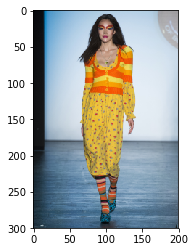

In [32]:
cm = CompositeMask(test_img_name, 0.3, 0.1, 16, 16)
#show an original runway image, resized to 200x300
cm.show_orig_image()

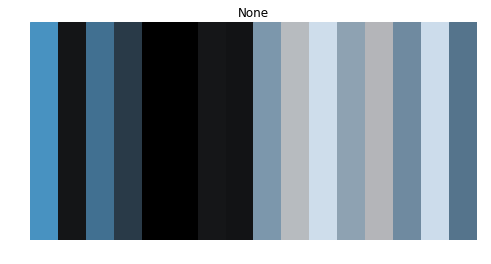

In [33]:
utils.make_palette_uniform_width(cm.bg_color_list_rgb)

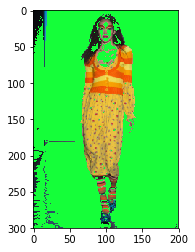

In [34]:
cm.show_first_masked_image()

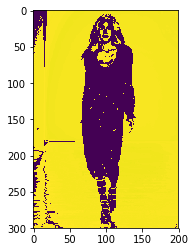

In [35]:
plt.imshow(cm.bg_composite_mask)
plt.show()


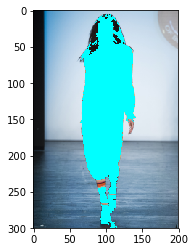

In [36]:
cm.plot_largest_contour()


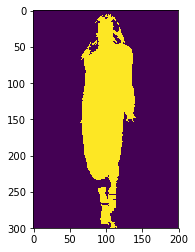

In [37]:
cm.make_boolean_mask_from_contours()
plt.imshow(cm.contour_mask)
plt.show()

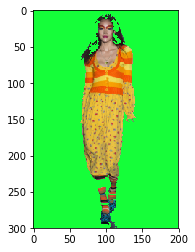

In [38]:
cm.make_contour_masked_image()
plt.imshow(cm.contour_masked_image)
plt.show()

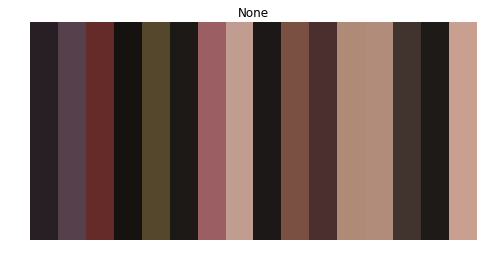

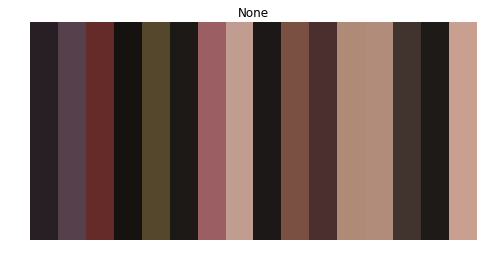

In [39]:
utils.make_palette_uniform_width(cm.face_color_list1)
utils.make_palette_uniform_width(cm.face_color_list)

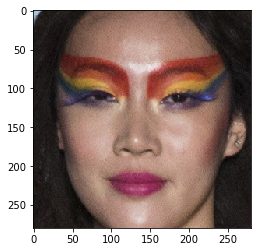

In [40]:
plt.imshow(utils.bgr_to_rgb(cm.face))
plt.show()

In [89]:
def find_best_threshold(thresh_list, lower_ratio, higher_ratio, image_name):
    good_ts = []
    for t in thresh_list:
        cm = CompositeMask(image_name, t)
        try: 
            cm.plot_largest_contour()
            cm.make_boolean_mask_from_contours()
            cm.make_contour_masked_image()

            face_size = np.prod(cm.face.shape[:2]) /100.
            size_of_largest_cont = np.count_nonzero(cm.contour_mask)
            ratio = size_of_largest_cont / face_size
            print t, ratio
            if ratio > lower_ratio and ratio < higher_ratio:
                good_ts.append(t)
            plt.imshow(cm.contour_mask)
            plt.show()
        except ValueError:
            print t, 'threshold is too high'
    return good_ts


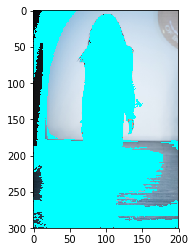

0.1 43.0


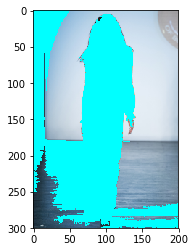

0.2 34.9336734694


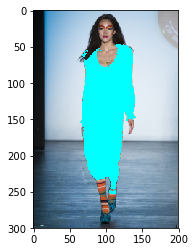

0.4 13.0510204082


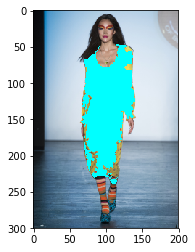

0.6 10.9158163265


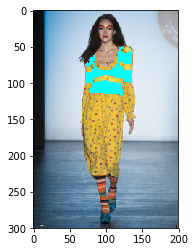

0.8 2.63520408163
1.2 threshold is too high
1.6 threshold is too high


[0.4, 0.6]

In [83]:
t = [0.1, 0.2, 0.4, 0.6, 0.8, 1.2, 1.6]
find_best_threshold(t, 10, 30, test_img_name)

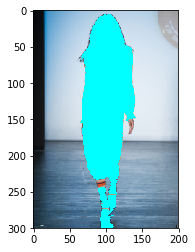

0.25 17.381377551


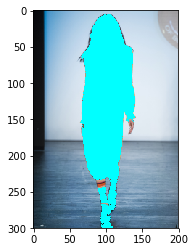

0.3 17.25


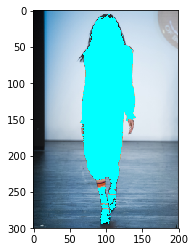

0.35 16.7410714286


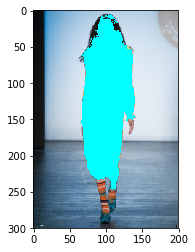

0.4 15.5216836735


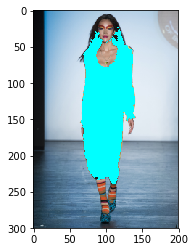

0.45 13.4910714286


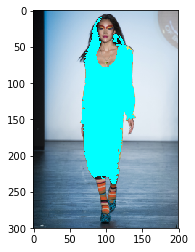

0.5 13.2525510204


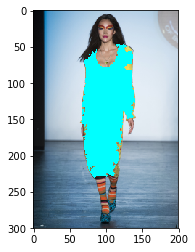

0.55 11.7181122449


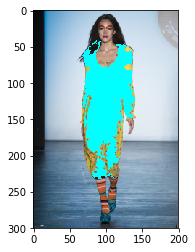

0.6 10.0854591837


[0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

In [84]:
new_ts = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
find_best_threshold(new_ts, 10, 30, test_img_name)

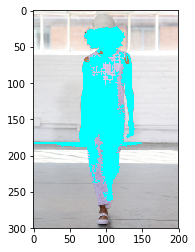

0.1 15.4815197429


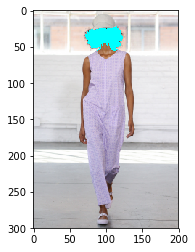

0.2 1.71028466483


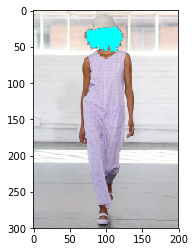

0.4 1.78919880624


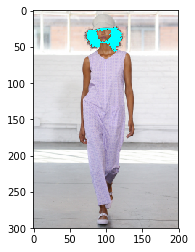

0.6 1.12918962351


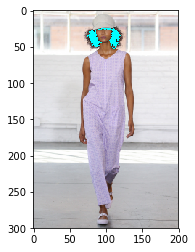

0.8 0.717401285583
1.2 threshold is too high
1.6 threshold is too high


[0.1]

In [85]:
test_img_name2 = 'Creatures-of-Comfort-spring-2018-look018.jpg'
find_best_threshold(t, 10, 30, test_img_name2)

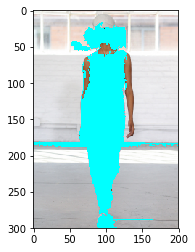

0.05 18.569214876


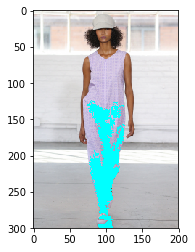

0.1 5.8468204775


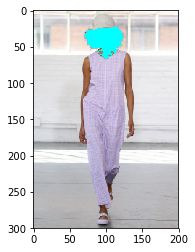

0.15 2.13068181818


[0.05]

In [86]:
new_ts = [0.05, 0.1, 0.15]
find_best_threshold(new_ts, 10, 30, test_img_name2)

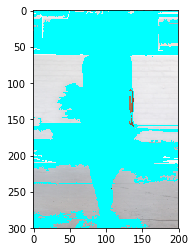

0.02 49.0501606979


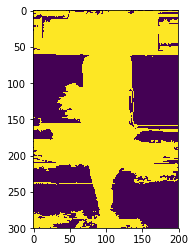

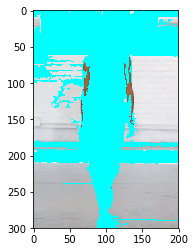

0.03 41.7039715335


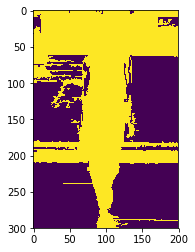

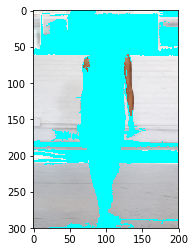

0.05 37.0494719927


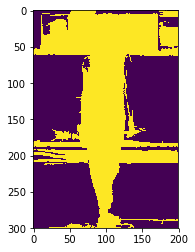

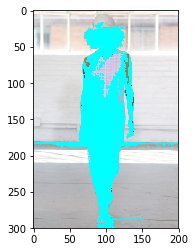

0.08 18.034033517


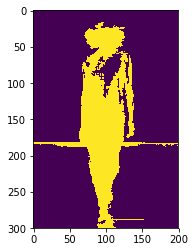

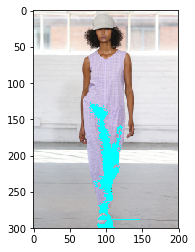

0.1 3.97870752984


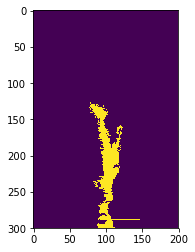

[0.08]

In [90]:
new_ts = [0.02, 0.03, 0.05, 0.08, 0.1]
find_best_threshold(new_ts, 10, 30, test_img_name2)


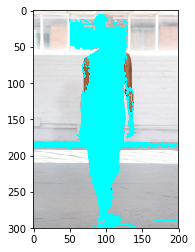

0.06 22.1820477502


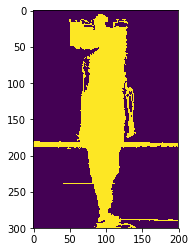

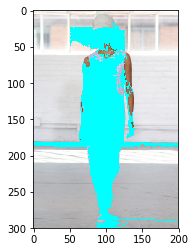

0.07 19.5950987144


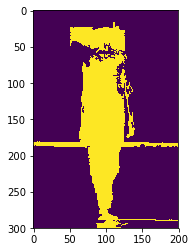

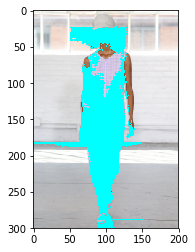

0.08 17.0483241506


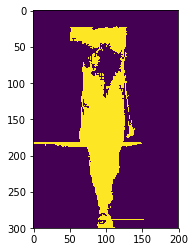

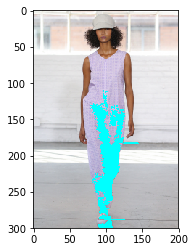

0.09 5.34750918274


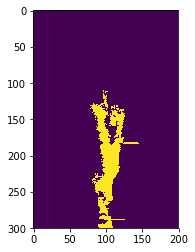

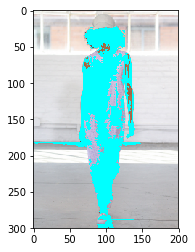

0.1 15.4112144169


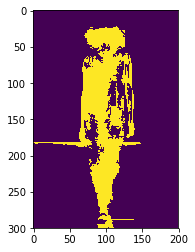

[0.06, 0.07, 0.08, 0.1]

In [91]:
new_ts = [0.06, 0.07, 0.08, 0.09, 0.1]
find_best_threshold(new_ts, 10, 30, test_img_name2)

In [68]:
def flatten_image(image):
    im = np.array(image, dtype=np.float64) / 255    
    w, h, colors = im.shape
    image_flat = np.reshape(im, (w * h, colors))
    return image_flat
    

def kmeans_palette_one_image(image, n_colors, sample_size = 500, seed = 17):
    image = flatten_image(image)        
    if len(image) > sample_size:
        sample_size = len(image)        
    random.seed(seed)
    sample = random.sample(image, sample_size)

    return KMeans(n_clusters=n_colors, random_state=seed).fit(sample)

def assign_kmeans_clusers(image, kmeans_object):
    image = flatten_image(image)    
    predictions = kmeans_object.predict(image)
    return predictions

def assign_colors_to_predictions(kmeans_object, predictions):
    return [kmeans_object.cluster_centers_[ix] for ix in predictions]

def reshape_color_predictions(orig_image, color_predicts):
    w, h, colors = orig_image.shape
    return np.array(color_predicts).reshape(w, h, colors)




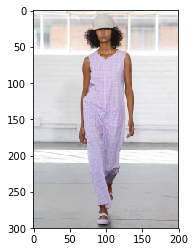

In [73]:
cm = CompositeMask(test_img_name2, 0.3, 0.1, 16, 16)
#show an original runway image, resized to 200x300
cm.show_orig_image()

In [74]:
kmeans = kmeans_palette_one_image(cm.image, 4)
preds = assign_kmeans_clusers(cm.image, kmeans)

In [75]:
color_preds = assign_colors_to_predictions(kmeans, preds)

In [76]:
kmeans_image = reshape_color_predictions(cm.image, color_preds)


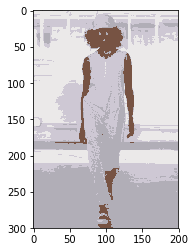

In [77]:
plt.imshow(utils.bgr_to_rgb(kmeans_image))
plt.show()

In [78]:
def make_kmeans_image(image, num_cols):
    kmeans = kmeans_palette_one_image(image, num_cols)
    preds = assign_kmeans_clusers(image, kmeans)
    color_preds = assign_colors_to_predictions(kmeans, preds)
    kmeans_image = reshape_color_predictions(image, color_preds)
    plt.imshow(utils.bgr_to_rgb(kmeans_image))

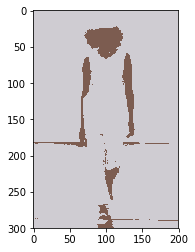

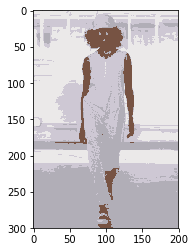

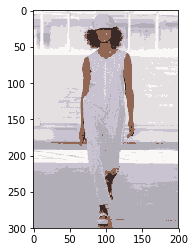

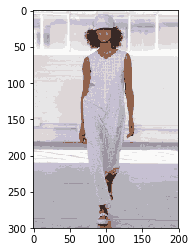

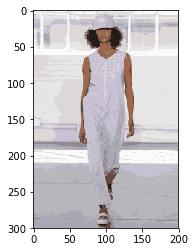

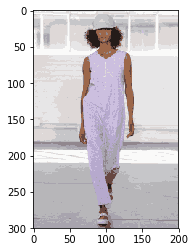

In [81]:
for num in [2, 4, 6, 8, 10, 12]:
    make_kmeans_image(cm.image, num)
    plt.show()

In [ ]:
#so now we need to do the kmeans segmenting and compare the segments to what was thresholded

<type 'NoneType'>


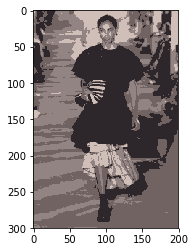

<type 'NoneType'>


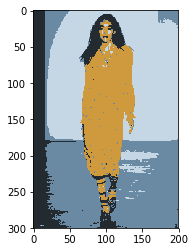

<type 'NoneType'>


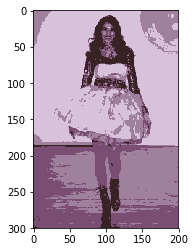

<type 'NoneType'>


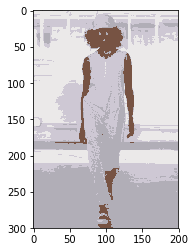

<type 'NoneType'>


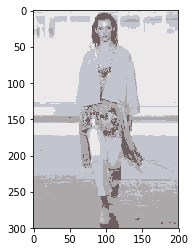

<type 'NoneType'>


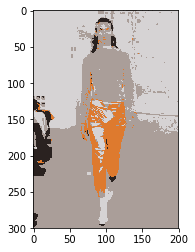

<type 'NoneType'>


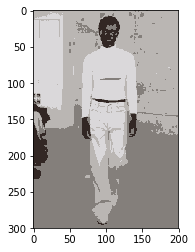

<type 'NoneType'>


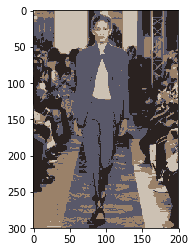

<type 'NoneType'>


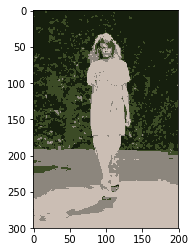

<type 'NoneType'>


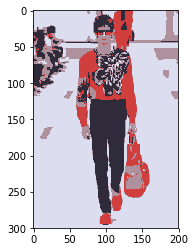

<type 'NoneType'>


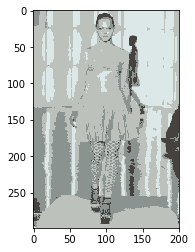

<type 'NoneType'>


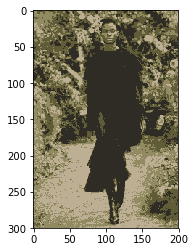

<type 'NoneType'>


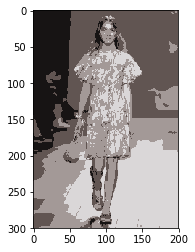

<type 'NoneType'>


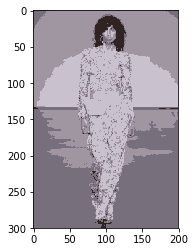

<type 'NoneType'>


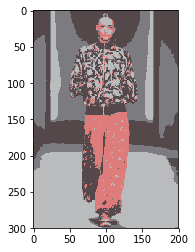

In [45]:
for f in os.listdir('data/test/'):
    if f.endswith('jpg'):
        cm = CompositeMask('data/test/' + f)
        im = make_kmeans_image(cm.image, 4)
        print type(im)
        plt.show()
        

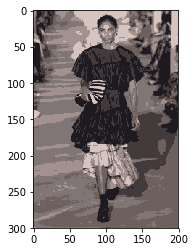

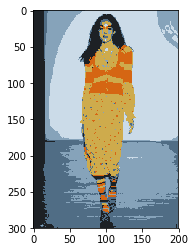

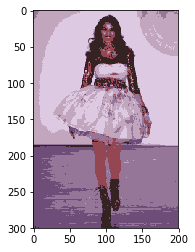

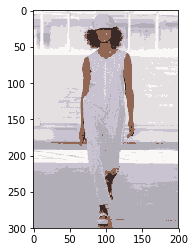

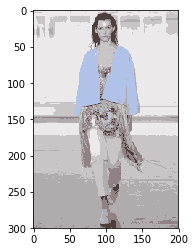

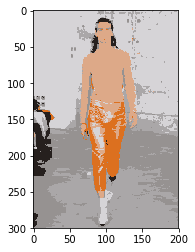

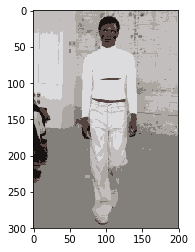

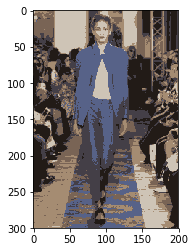

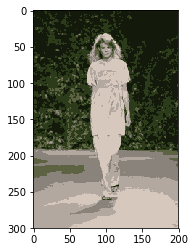

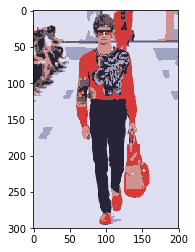

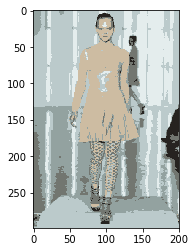

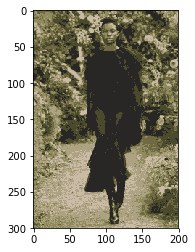

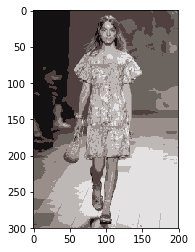

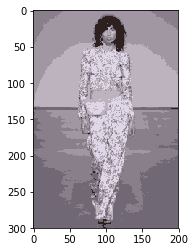

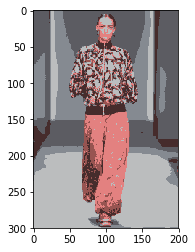

In [47]:
for f in os.listdir('data/test/'):
    if f.endswith('jpg'):
        cm = CompositeMask('data/test/' + f)
        make_kmeans_image(cm.image, 6)
        plt.show()

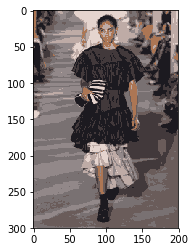

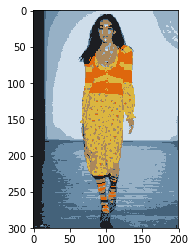

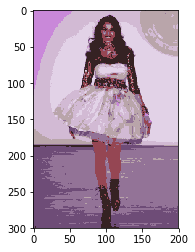

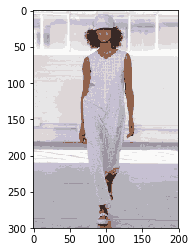

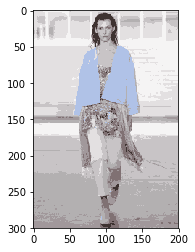

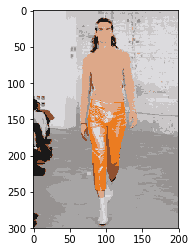

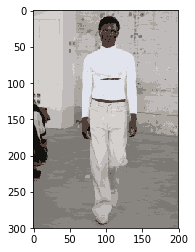

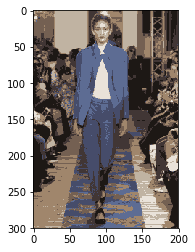

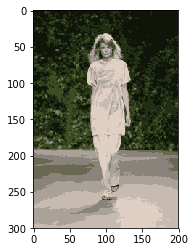

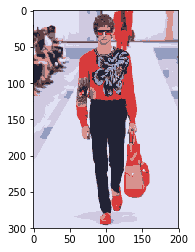

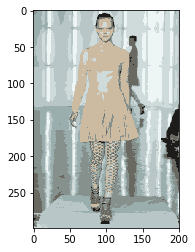

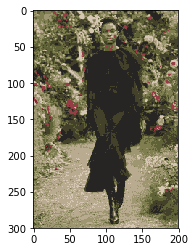

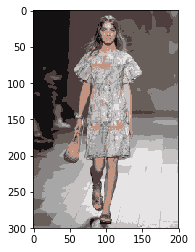

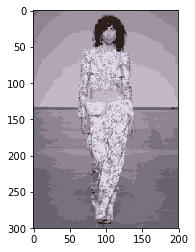

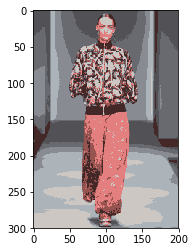

In [48]:
for f in os.listdir('data/test/'):
    if f.endswith('jpg'):
        cm = CompositeMask('data/test/' + f)
        make_kmeans_image(cm.image, 8)
        plt.show()

(300, 200)


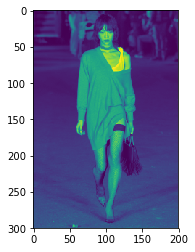

(300, 200)


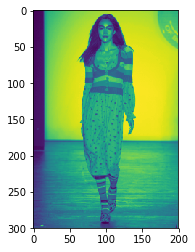

(300, 200)


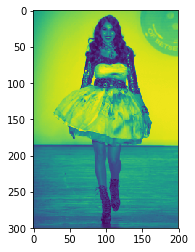

(300, 200)


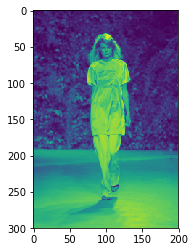

(300, 200)


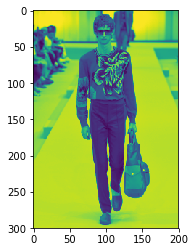

(300, 200)


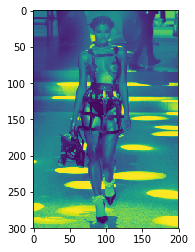

In [104]:
for f in os.listdir('data/'):
    if f.endswith('jpg'):
        cm = CompositeMask('data/' + f)
        grey_image = cv2.cvtColor(cm.image, cv2.COLOR_RGB2GRAY)
        print grey_image.shape
        plt.imshow(grey_image)
        plt.show()